In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
link = 'https://www.hltv.org/stats/teams/matches/8135/forZe'

In [3]:
resp = requests.get(link)
soup = BeautifulSoup(resp.text, 'lxml')

In [4]:
print(soup.title.text)


HLTV.org - The home of competitive Counter-Strike


### Пустой датафрейм

In [55]:
column_names = ['Date',	'Event', 'Team', 'Opponent',	'Map',	'Result', 'Home_team', 'Opponent_team', 'W_L']
df = pd.DataFrame(columns = column_names)

In [56]:
df

,Date,Event,Team,Opponent,Map,Result,Home_team,Opponent_team,W_L


### Даты

In [57]:
dates = []
for tr in soup.find_all('tr'):
  try:
    for tddate in tr.find('td', {"class": "time"}):
      dates.append(tddate.text)
  except:
    pass

In [58]:
len(dates)

883

### Турнир

In [59]:
competition = []
for tr in soup.find_all('tr'):
  try:
    for tdcompet in tr.find('td', {"class": "gtSmartphone-only"}):
      competition.append(tdcompet.text)
  except:
    pass

In [60]:
len(competition)

883

### Оппонент

In [61]:
opponent = []
for tr in soup.find_all('tr'):
  try:
    for tdopponent in tr.find('td', {"class": None}):
      opponent.append(tdopponent.text)
  except:
    pass

In [62]:
len(opponent)

883

### Карта

In [63]:
maps = []
for tr in soup.find_all('tr'):
  try:
    for tdmap in tr.find('td', {"class": "statsMapPlayed"}):
      maps.append(tdmap.text)
  except:
    pass

In [64]:
len(maps)

883

### Счет

In [65]:
score = []
for tr in soup.find_all('tr'):
  try:
    for tdscore in tr.find('td', {"class": "gtSmartphone-only text-center "}):
      score.append(tdscore.text)
  except:
    pass

In [66]:
len(score)

883

### Заполнение датасета

In [67]:
df['Date'] = dates
df['Event'] = competition
df['Team'] = 'forZe'
df['Opponent'] = opponent
df['Map'] = maps
df['Result'] = score

In [68]:
for i, v in enumerate(df['Result']):
  scores = v.split('-')
  df['Home_team'][i] = int(scores[0])
  df['Opponent_team'][i] = int(scores[1])

In [69]:
for i, v in enumerate(df['Home_team']):
  if df['Home_team'][i] > df['Opponent_team'][i]:
    df['W_L'][i] = 'W'
  else:
    df['W_L'][i] = 'L'

In [70]:
df.head(5)

,Date,Event,Team,Opponent,Map,Result,Home_team,Opponent_team,W_L
0,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Mirage,16 - 13,16,13,W
1,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Nuke,14 - 16,14,16,L
2,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Inferno,19 - 16,19,16,W
3,15/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Giants,Train,16 - 12,16,12,W
4,15/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Giants,Inferno,16 - 10,16,10,W


In [80]:
subset = df[df['Opponent'] == 'Nordavind']
subset

,Date,Event,Team,Opponent,Map,Result,Home_team,Opponent_team,W_L
0,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Mirage,16 - 13,16,13,W
1,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Nuke,14 - 16,14,16,L
2,17/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Inferno,19 - 16,19,16,W
23,08/08/20,FunSpark ULTI 2020 Europe Qualifier,forZe,Nordavind,Dust2,17 - 19,17,19,L
46,03/07/20,Hellcase Cup 8,forZe,Nordavind,Overpass,16 - 14,16,14,W
47,03/07/20,Hellcase Cup 8,forZe,Nordavind,Inferno,16 - 13,16,13,W
161,15/04/20,Home Sweet Home Cup 2,forZe,Nordavind,Nuke,12 - 16,12,16,L
162,15/04/20,Home Sweet Home Cup 2,forZe,Nordavind,Inferno,16 - 10,16,10,W
163,15/04/20,Home Sweet Home Cup 2,forZe,Nordavind,Overpass,14 - 16,14,16,L
170,10/04/20,Home Sweet Home Cup 1,forZe,Nordavind,Mirage,16 - 12,16,12,W


### Общая статистика

### Графики

[Text(0, 0, 'Mirage'),
 Text(0, 0, 'Nuke'),
 Text(0, 0, 'Inferno'),
 Text(0, 0, 'Train'),
 Text(0, 0, 'Dust2'),
 Text(0, 0, 'Overpass'),
 Text(0, 0, 'Vertigo'),
 Text(0, 0, 'Cache'),
 Text(0, 0, 'Cobblestone')]

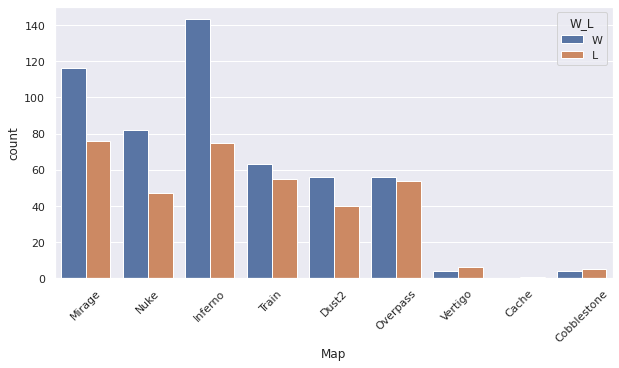

In [79]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Map", hue='W_L', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Mirage'),
 Text(0, 0, 'Nuke'),
 Text(0, 0, 'Inferno'),
 Text(0, 0, 'Dust2'),
 Text(0, 0, 'Overpass')]

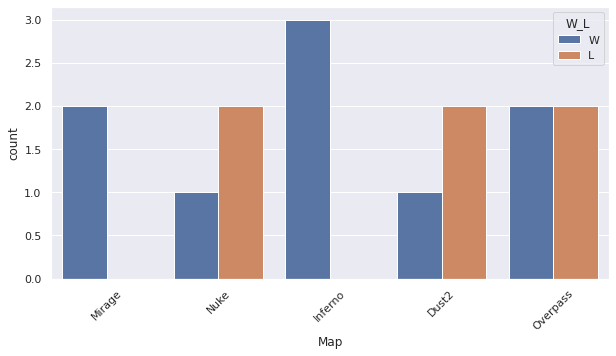

In [81]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Map", hue='W_L', data=subset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)